In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Número de particiones (2 o 3): 2
Porcentaje de datos de entrenamiento (0-1): 0.8
Porcentaje de datos de prueba (0-1): 0.2


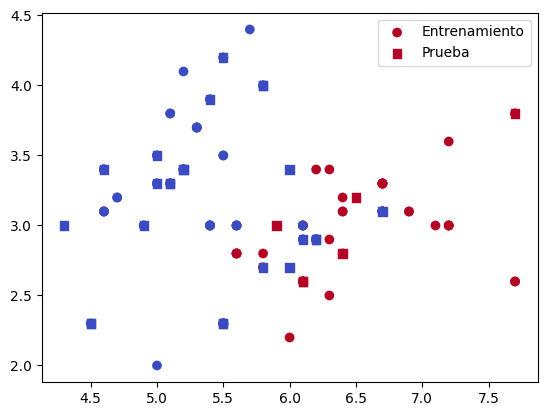

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Practica 7/irisbin.csv')
# Lista con los nombres de columna que deseas asignar
nombres_columnas = ["X1", "X2", "X3","X4", "Y1", "Y2","Y3"]

# Asignar nombres a las columnas del DataFrame
df.columns = nombres_columnas

X = df[["X1", "X2", "X3","X4"]]
y = df[["Y1", "Y2","Y3"]]

# Método 1: Partición Aleatoria
# Solicitar al usuario el número de particiones
num_particiones = int(input("Número de particiones (2 o 3): "))

if num_particiones not in [2, 3]:
    print("Número de particiones no válido. Debe ser 2 o 3.")
else:
    porcentaje_entrenamiento = float(input("Porcentaje de datos de entrenamiento (0-1): "))
    porcentaje_prueba = float(input("Porcentaje de datos de prueba (0-1): "))

    if num_particiones == 3:
        porcentaje_ajuste = float(input("Porcentaje de datos de ajuste (0-1): "))

        if porcentaje_entrenamiento + porcentaje_prueba + porcentaje_ajuste != 1.0:
            print("La suma de los porcentajes debe ser igual a 1.0.")
        else:
            # Realizar la división en entrenamiento, prueba y ajuste
            X_train, X, y_train, y = train_test_split(X, y, test_size=porcentaje_entrenamiento)
            X_test, X_ajuste, y_test, y_ajuste = train_test_split(X, y, test_size=porcentaje_prueba / (porcentaje_prueba + porcentaje_ajuste))

            # Utiliza todas las columnas en el DataFrame original para acceder a los datos
            plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.iloc[:, 0], label='Entrenamiento', marker='o', cmap='coolwarm')
            plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.iloc[:, 0], label='Prueba', marker='s', cmap='coolwarm')
            plt.scatter(X_ajuste.iloc[:, 0], X_ajuste.iloc[:, 1], c=y_ajuste.iloc[:, 0], label='Ajuste', marker='^', cmap='coolwarm')
            plt.legend()
            plt.show()
    else:
        if porcentaje_entrenamiento + porcentaje_prueba != 1.0:
            print("La suma de los porcentajes debe ser igual a 1.0.")
        else:
            # Realizar la división en entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=porcentaje_prueba)

            # Utiliza todas las columnas en el DataFrame original para acceder a los datos
            plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.iloc[:, 0], label='Entrenamiento', marker='o', cmap='coolwarm')
            plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.iloc[:, 0], label='Prueba', marker='s', cmap='coolwarm')
            plt.legend()
            plt.show()

Número de particiones (2 o 3): 3
Porcentaje de datos de entrenamiento (0-1): 0.5
Porcentaje de datos de prueba (0-1): 0.2
Porcentaje de datos de ajuste (0-1): 0.3


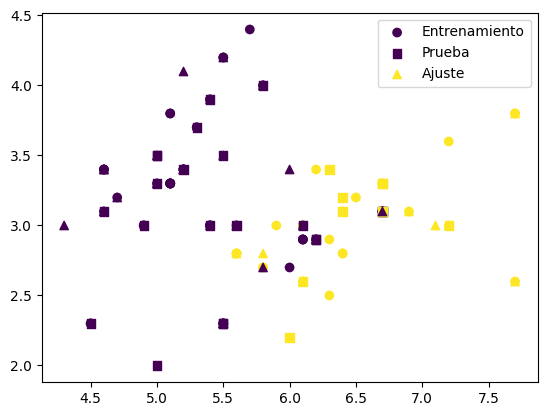

In [4]:
# Carga el DataFrame desde el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Practica 7/irisbin.csv')

# Lista con los nombres de columna que deseas asignar
nombres_columnas = ["X1", "X2", "X3", "X4", "Y1", "Y2", "Y3"]

# Asignar nombres a las columnas del DataFrame
df.columns = nombres_columnas

X = df[["X1", "X2", "X3", "X4"]]
y = df[["Y1", "Y2", "Y3"]]

# Método 2: Partición por Clases
# Solicitar al usuario el número de particiones (2 o 3)
num_particiones = int(input("Número de particiones (2 o 3): "))

if num_particiones not in [2, 3]:
    print("Número de particiones no válido. Debe ser 2 o 3.")
else:
    porcentaje_entrenamiento = float(input("Porcentaje de datos de entrenamiento (0-1): "))
    porcentaje_prueba = float(input("Porcentaje de datos de prueba (0-1): "))

    if num_particiones == 3:
        porcentaje_ajuste = float(input("Porcentaje de datos de ajuste (0-1): "))

        if porcentaje_entrenamiento + porcentaje_prueba + porcentaje_ajuste != 1.0:
            print("La suma de los porcentajes debe ser igual a 1.0.")
        else:
            # Realizar la división por clases en entrenamiento, prueba y ajuste
            # Divide los datos por clase y realiza la partición por clase
            clases_unicas = y.iloc[:, 0].unique()
            X_train, X_test, y_train, y_test = [], [], [], []

            for clase in clases_unicas:
                X_clase = X[y.iloc[:, 0] == clase]
                y_clase = y[y.iloc[:, 0] == clase]
                X_clase_train, X_clase_test, y_clase_train, y_clase_test = train_test_split(X_clase, y_clase, test_size=porcentaje_prueba)
                X_train.append(X_clase_train)
                X_test.append(X_clase_test)
                y_train.append(y_clase_train)
                y_test.append(y_clase_test)

            X_train = pd.concat(X_train)
            X_test = pd.concat(X_test)
            y_train = pd.concat(y_train)
            y_test = pd.concat(y_test)

            # Realizar la división por clases en el conjunto de ajuste
            X_train, X_ajuste, y_train, y_ajuste = train_test_split(X_train, y_train, test_size=porcentaje_ajuste / (porcentaje_entrenamiento + porcentaje_ajuste))

            # Utiliza todas las columnas en el DataFrame original para acceder a los datos
            plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.iloc[:, 0], label='Entrenamiento', marker='o')
            plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.iloc[:, 0], label='Prueba', marker='s')
            plt.scatter(X_ajuste.iloc[:, 0], X_ajuste.iloc[:, 1], c=y_ajuste.iloc[:, 0], label='Ajuste', marker='^')
            plt.legend()
            plt.show()
    else:
        if porcentaje_entrenamiento + porcentaje_prueba != 1.0:
            print("La suma de los porcentajes debe ser igual a 1.0.")
        else:
            # Realizar la división por clases en entrenamiento y prueba
            # Divide los datos por clase y realiza la partición por clase
            clases_unicas = y.iloc[:, 0].unique()
            X_train, X_test, y_train, y_test = [], [], [], []

            for clase in clases_unicas:
                X_clase = X[y.iloc[:, 0] == clase]
                y_clase = y[y.iloc[:, 0] == clase]
                X_clase_train, X_clase_test, y_clase_train, y_clase_test = train_test_split(X_clase, y_clase, test_size=porcentaje_prueba)
                X_train.append(X_clase_train)
                X_test.append(X_clase_test)
                y_train.append(y_clase_train)
                y_test.append(y_clase_test)

            X_train = pd.concat(X_train)
            X_test

Número de particiones (2 o 3): 3
Porcentaje de datos de entrenamiento (0-1): 0.4
Porcentaje de datos de prueba (0-1): 0.3
Porcentaje de datos de ajuste (0-1): 0.3


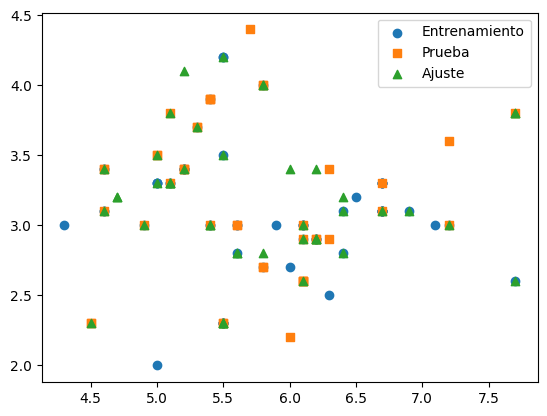

In [6]:
# Carga el DataFrame desde el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Practica 7/irisbin.csv')

# Lista con los nombres de columna que deseas asignar
nombres_columnas = ["X1", "X2", "X3", "X4", "Y1", "Y2", "Y3"]

# Asignar nombres a las columnas del DataFrame
df.columns = nombres_columnas

X = df[["X1", "X2", "X3", "X4"]]
y = df[["Y1", "Y2", "Y3"]]

# Método 3: Partición por Series Temporales (Suponiendo que los datos están ordenados por tiempo)
# Solicitar al usuario el número de particiones (2 o 3)
num_particiones = int(input("Número de particiones (2 o 3): "))

if num_particiones not in [2, 3]:
    print("Número de particiones no válido. Debe ser 2 o 3.")
else:
    porcentaje_entrenamiento = float(input("Porcentaje de datos de entrenamiento (0-1): "))
    porcentaje_prueba = float(input("Porcentaje de datos de prueba (0-1): "))

    if num_particiones == 3:
        porcentaje_ajuste = float(input("Porcentaje de datos de ajuste (0-1): "))

        if porcentaje_entrenamiento + porcentaje_prueba + porcentaje_ajuste != 1.0:
            print("La suma de los porcentajes debe ser igual a 1.0.")
        else:
            # Realizar la partición por series temporales
            total_muestras = len(X)
            train_size = int(total_muestras * porcentaje_entrenamiento)
            test_size = int(total_muestras * porcentaje_prueba)

            if num_particiones == 3:
                ajuste_size = int(total_muestras * porcentaje_ajuste)
                X_train = X[:train_size]
                X_test = X[train_size:train_size + test_size]
                X_ajuste = X[train_size + test_size:train_size + test_size + ajuste_size]
            else:
                X_train = X[:train_size]
                X_test = X[train_size:train_size + test_size]

            y_train = y[:len(X_train)]
            y_test = y[len(X_train):len(X_train) + len(X_test)]

            # Utiliza todas las columnas en el DataFrame original para acceder a los datos
            plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], label='Entrenamiento', marker='o')
            plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], label='Prueba', marker='s')

            if num_particiones == 3:
                plt.scatter(X_ajuste.iloc[:, 0], X_ajuste.iloc[:, 1], label='Ajuste', marker='^')

            plt.legend()
            plt.show()


Número de particiones (2 o 3): 3
Porcentaje de datos de entrenamiento (0-1): 0.5
Porcentaje de datos de prueba (0-1): 0.1
Porcentaje de datos de ajuste (0-1): 0.4


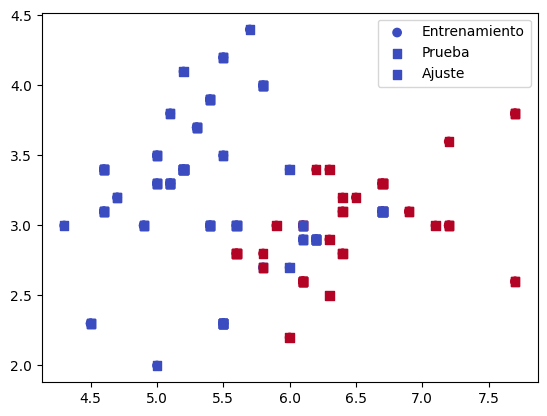

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Practica 7/irisbin.csv')
# Lista con los nombres de columna que deseas asignar
nombres_columnas = ["X1", "X2", "X3","X4", "Y1", "Y2","Y3"]

# Asignar nombres a las columnas del DataFrame
df.columns = nombres_columnas

X = df[["X1", "X2", "X3","X4"]]
y = df[["Y1", "Y2","Y3"]]

# Método 4: Partición Estratificada
# Solicitar al usuario el número de particiones
num_particiones = int(input("Número de particiones (2 o 3): "))

if num_particiones not in [2, 3]:
    print("Número de particiones no válido. Debe ser 2 o 3.")
else:
    porcentaje_entrenamiento = float(input("Porcentaje de datos de entrenamiento (0-1): "))
    porcentaje_prueba = float(input("Porcentaje de datos de prueba (0-1): "))

    if num_particiones == 3:
        porcentaje_ajuste = float(input("Porcentaje de datos de ajuste (0-1): "))

        if porcentaje_entrenamiento + porcentaje_prueba + porcentaje_ajuste != 1.0:
            print("La suma de los porcentajes debe ser igual a 1.0.")
        else:
            # Realizar la división en entrenamiento, prueba y ajuste estratificada por clase
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=porcentaje_prueba, stratify=y)
            X_test, X_ajuste, y_test, y_ajuste = train_test_split(X, y, test_size=porcentaje_prueba / (porcentaje_prueba + porcentaje_ajuste))

            # Utiliza todas las columnas en el DataFrame original para acceder a los datos
            plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.iloc[:, 0], label='Entrenamiento', marker='o', cmap='coolwarm')
            plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.iloc[:, 0], label='Prueba', marker='s', cmap='coolwarm')
            plt.scatter(X_ajuste.iloc[:, 0], X_ajuste.iloc[:, 1], c=y_ajuste.iloc[:, 0], label='Ajuste', marker='s', cmap='coolwarm')
            plt.legend()
            plt.show()
    else:
        if porcentaje_entrenamiento + porcentaje_prueba != 1.0:
            print("La suma de los porcentajes debe ser igual a 1.0.")
        else:
            # Realizar la división en entrenamiento y prueba estratificada por clase
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=porcentaje_prueba, random_state=42, stratify=y)

            # Utiliza todas las columnas en el DataFrame original para acceder a los datos
            plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.iloc[:, 0], label='Entrenamiento', marker='o', cmap='coolwarm')
            plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.iloc[:, 0], label='Prueba', marker='s', cmap='coolwarm')
            plt.legend()
            plt.show()

Número de particiones (2 o 3): 3
Porcentaje de datos de entrenamiento (0-1): 0.2
Porcentaje de datos de prueba (0-1): 0.4
Porcentaje de datos de ajuste (0-1): 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentaje de datos de ajuste (0-1): 0.2


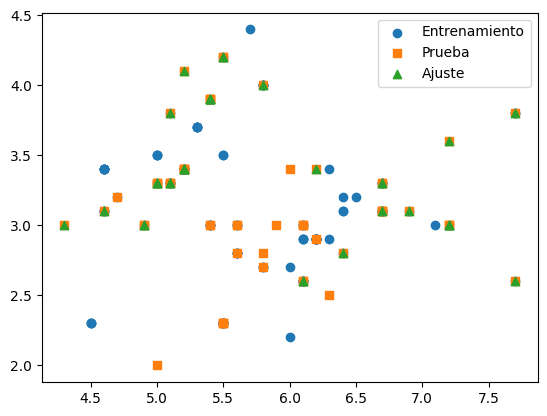

In [9]:
# Carga el DataFrame desde el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Practica 7/irisbin.csv')

# Lista con los nombres de columna que deseas asignar
nombres_columnas = ["X1", "X2", "X3", "X4", "Y1", "Y2", "Y3"]

# Asignar nombres a las columnas del DataFrame
df.columns = nombres_columnas

X = df[["X1", "X2", "X3", "X4"]]
y = df[["Y1", "Y2", "Y3"]]

# Método: Partición por Similaridad de Datos (usando k-means)
# Solicitar al usuario el número de particiones (2 o 3)
num_particiones = int(input("Número de particiones (2 o 3): "))

if num_particiones not in [2, 3]:
    print("Número de particiones no válido. Debe ser 2 o 3.")
else:
    porcentaje_entrenamiento = float(input("Porcentaje de datos de entrenamiento (0-1): "))
    porcentaje_prueba = float(input("Porcentaje de datos de prueba (0-1): "))

    if num_particiones == 3:
        porcentaje_ajuste = float(input("Porcentaje de datos de ajuste (0-1): "))

        if porcentaje_entrenamiento + porcentaje_prueba + porcentaje_ajuste != 1.0:
            print("La suma de los porcentajes debe ser igual a 1.0.")
        else:

            # Elegir el número de clústeres igual al número de particiones
            n_clusters = num_particiones

            kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
            labels = kmeans.labels_

            X_train, X_test, y_train, y_test = [], [], [], []

            for i in range(n_clusters):
                X_cluster = X[labels == i]
                y_cluster = y[labels == i]
                train_size = int(len(X_cluster) * porcentaje_entrenamiento)
                X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=porcentaje_prueba)
                X_train.append(X_cluster_train)
                X_test.append(X_cluster_test)
                y_train.append(y_cluster_train)
                y_test.append(y_cluster_test)

            X_train = pd.concat(X_train)
            X_test = pd.concat(X_test)
            y_train = pd.concat(y_train)
            y_test = pd.concat(y_test)

            # Realizar la partición por similaridad de datos
            plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], label='Entrenamiento', marker='o')
            plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], label='Prueba', marker='s')

            if num_particiones == 3:
                porcentaje_ajuste = float(input("Porcentaje de datos de ajuste (0-1): "))
                porcentaje_prueba_ajuste = porcentaje_prueba / (porcentaje_prueba + porcentaje_ajuste)
                ajuste_size = int(len(X_cluster) * porcentaje_prueba_ajuste)
                X_ajuste = X_test[:ajuste_size]
                y_ajuste = y_test[:ajuste_size]
                X_test = X_test[ajuste_size:]
                y_test = y_test[ajuste_size:]
                plt.scatter(X_ajuste.iloc[:, 0], X_ajuste.iloc[:, 1], label='Ajuste', marker='^')

            plt.legend()
            plt.show()
